# Atividade: Prevendo a Qualidade de Vinhos a partir de Propriedades Químicas

In [ ]:
# @title Nome - 1º Integrante:
Nome1 = "Insira nome completo" # @param {type:"string"}
Numero = "Insira o RA" # @param {type:"string"}

In [ ]:
# @title Nome - 2º Integrante:
Nome1 = "Insira nome completo" # @param {type:"string"}
Numero = "Insira o RA" # @param {type:"string"}

## Contextualização: IA para Saúde e Meio Ambiente

As emissões de dióxido de carbono (CO₂) dos veículos são um dos principais contribuintes para a poluição atmosférica. A exposição prolongada a poluentes como CO₂, óxidos de nitrogênio (NOx) e material particulado está associada a diversos problemas de saúde pública, incluindo:

- Aumento de doenças respiratórias, como asma e bronquite;
- Agravamento de condições cardiovasculares;
- Redução da expectativa de vida em áreas urbanas.

De acordo com a Organização Mundial da Saúde (OMS), cerca de 7 milhões de mortes por ano estão associadas à poluição do ar. Dessa forma, prever e controlar as emissões de veículos é essencial não só para o meio ambiente, mas também para a **qualidade de vida e saúde da população**.

Nesta atividade, você utilizará técnicas de **inteligência artificial aplicada à saúde e sustentabilidade** para estimar as emissões de CO₂ de veículos, com base em características técnicas como o tipo de combustível, consumo urbano e rodoviário, tipo de transmissão, entre outros.

Seu modelo poderá, futuramente, ser usado por agências de regulação ambiental ou por governos para **identificar veículos mais poluentes**, **avaliar políticas públicas** e **reduzir impactos negativos na saúde coletiva**.

---

Mais do que apenas treinar um modelo, esta atividade convida você a entender o comportamento das variáveis, tomar decisões de pré-processamento, construir modelos e refletir sobre os resultados obtidos.

**Objetivo**

Produzir um **relatório técnico** documentando todas as etapas do processo de análise, incluindo exploração de dados, tratamento de variáveis, modelagem e avaliação.

**Tarefa de Machine Learning**

Prever a variável contínua `CO2 Emissions(g/km)`, a partir das variáveis de entrada.

---

## Link do dataset

[CO2 Emission by Vehicles - Kaggle](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles)

---

## Etapas da Análise

### 1. Carregue os dados e observe as primeiras linhas
- Quais variáveis o dataset contém e o que elas significam?
- Quais são os tipos de variáveis?
- Existem valores faltantes ou suspeitos?
- Crie um gráfico de dispersão entre a emissão de CO₂ e o consumo de combustível.

### 2. Tipo de Tarefa
- Qual tipo de tarefa de aprendizado de máquina esse problema representa?

### 3. Pré-processamento
- Como tratar variáveis como `Fuel Type` ou `Transmission`?
- Há variáveis altamente correlacionadas? Você usaria todas?

### 4. Divisão dos Dados
- Divida o conjunto em treino e teste (por exemplo, 80%/20%).

### 5. Treinamento de Modelos
Treine ao menos dois modelos para estimar as emissões de CO₂:
- Exemplos: regressão linear, k-vizinhos próximos, árvore de decisão, floresta aleatória.

### 6. Avaliação de Desempenho
- Quais métricas são mais adequadas para esse tipo de tarefa?  
- O modelo parece estar superajustado ou subajustado?

### 7. Interpretação dos Resultados
- Quais variáveis mais influenciam na emissão de CO₂?
- Que melhorias ou ajustes poderiam ser feitos?

---

## Desafio Extra

Crie um gráfico de dispersão entre a emissão de CO₂ e o consumo de combustível. O que você observa?  
- A relação é linear?  
- Consegue pensar em uma relação que se adapte melhor a esses dados?

---


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

### 1. Carregue os dados e observe as primeiras linhas.


In [ ]:
df = pd.read_csv('CO2 Emissions_Canada.csv')

print(f'Dimensionalidade: {df.shape}')

# Ver primeiras linhas
df.head()

Dimensionalidade: (7385, 12)


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Quais variáveis o dataset contém e o que elas significam?

* `Make`:	Marca do veículo (ex: Ford, Toyota)
* `Model`:	Modelo do veículo
* `Vehicle Class`:	Categoria do veículo (ex: SUV, compacto, caminhonete)
* `Engine Size(L)`:	Tamanho do motor em litros
* `Cylinders`:	Número de cilindros do motor
* `Transmission`:	Tipo de câmbio (ex: automática, manual, número de marchas)
* `Fuel Type`: Tipo de combustível (ex: gasolina, diesel, eletricidade)
* `Fuel Consumption City (L/100 km)`:	Consumo de combustível na cidade
* `Fuel Consumption Hwy (L/100 km)`:	Consumo de combustível na estrada
* `Fuel Consumption Comb (L/100 km)`:	Consumo combinado (cidade + estrada) em litros por 100 km
* `Fuel Consumption Comb (mpg)`:	Consumo combinado em milhas por galão (métrica usada nos EUA)
* `CO2 Emissions(g/km)`:	Emissão de dióxido de carbono por quilômetro rodado (variável-alvo)


Quais são os tipos de variáveis?

* `Make`:	Qualitativa nominal
* `Model`:	Qualitativa nominal
* `Vehicle Class`:	Qualitativa nominal
* `Engine Size(L)`:	Quantitativa contínua
* `Cylinders`:	Quantitativa discreta
* `Transmission`:	Qualitativa nominal
* `Fuel Type`: Qualitativa nominal
* `Fuel Consumption City (L/100 km)`:	Quantitativa contínua
* `Fuel Consumption Hwy (L/100 km)`:	Quantitativa contínua
* `Fuel Consumption Comb (L/100 km)`:	Quantitativa contínua
* `Fuel Consumption Comb (mpg)`:	Quantitativa discreta
* `CO2 Emissions(g/km)`:	Quantitativa discreta


Existem valores faltantes ou suspeitos?

In [ ]:
df.isnull().sum()

,0
Make,0
Model,0
Vehicle Class,0
Engine Size(L),0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption City (L/100 km),0
Fuel Consumption Hwy (L/100 km),0
Fuel Consumption Comb (L/100 km),0


Não parece haver nenhuma valor faltante no dataset. Podemos calcular as estatísticas descritivas para ver em mais detalhes.

In [ ]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


Numa análise superficial, não parece haver nenhum dado estranho no dataset.

Crie um gráfico de dispersão entre a emissão de CO₂ e o consumo de combustível.

<ipython-input-7-de1963968262>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


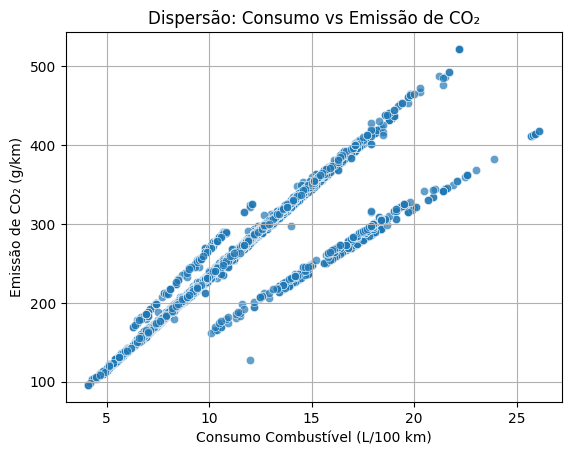

In [ ]:
# Gráfico de dispersão com hue usando seaborn
sns.scatterplot(
    data=df,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    palette='viridis',
    alpha=0.7
)

plt.xlabel('Consumo Combustível (L/100 km)')
plt.ylabel('Emissão de CO₂ (g/km)')
plt.title('Dispersão: Consumo vs Emissão de CO₂')
plt.grid(True)
plt.show()

Por curiosidade, vamos colorir o gráfico de dispersão de acordo com o tamanho do motor.

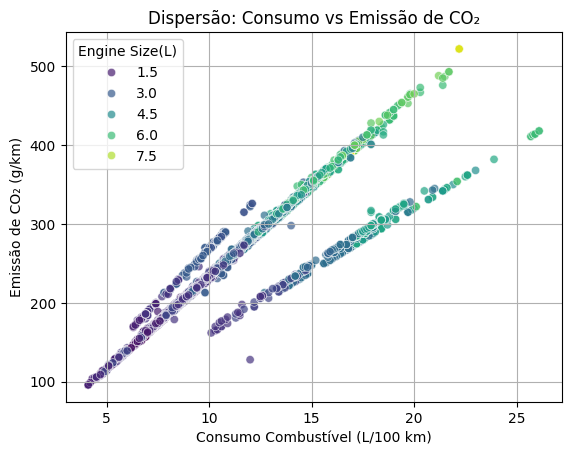

In [ ]:
# Gráfico de dispersão com hue usando seaborn
sns.scatterplot(
    data=df,
    x='Fuel Consumption Comb (L/100 km)',
    y='CO2 Emissions(g/km)',
    hue='Engine Size(L)',
    palette='viridis',
    alpha=0.7
)

plt.xlabel('Consumo Combustível (L/100 km)')
plt.ylabel('Emissão de CO₂ (g/km)')
plt.title('Dispersão: Consumo vs Emissão de CO₂')
plt.grid(True)
plt.show()

### 2. Qual tipo de tarefa de aprendizado de máquina esse problema representa?

Este é um caso de **aprendizado supervisionado**, e representa uma tarefa de **regressão**, em que o objetivo é prever o valor de uma variável contínua.



### 3. Realize o pré-processamento necessário:

Como tratar as variáveis como `Fuel Type` ou `Transmission`?

Essas variáveis são **categóricas**, ou seja, são compostas por textos que representam categorias distintas. Para usá-las em modelos de machine learning, que geralmente trabalham com números, você deve convertê-las para um formato numérico.

A forma mais comum é usar **one-hot encoding**, que transforma cada categoria em uma nova coluna com valores 0 ou 1.

Algumas variáveis como `Make`, `Model` e `Vehicle Class` possuem muitos valores únicos. Convertê-las em variáveis dummy geraria um número excessivo de features. Por isso, vamos descartar essas variáveis. Converteremos apenas as variáveis `Fuel Type` e `Transmission`.

In [ ]:
# Remover variáveis com alta cardinalidade
df = df.drop(columns=['Make', 'Model', 'Vehicle Class'])

In [ ]:
df_encoded = pd.get_dummies(df, columns=['Fuel Type', 'Transmission'], drop_first=True)

df_encoded

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_N,Fuel Type_X,...,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,2.0,4,9.9,6.7,8.5,33,196,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.4,4,11.2,7.7,9.6,29,221,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1.5,4,6.0,5.8,5.9,48,136,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3.5,6,12.7,9.1,11.1,25,255,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.5,6,12.1,8.7,10.6,27,244,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,10.7,7.7,9.4,30,219,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7381,2.0,4,11.2,8.3,9.9,29,232,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7382,2.0,4,11.7,8.6,10.3,27,240,False,False,False,...,True,False,False,False,False,False,False,False,False,False
7383,2.0,4,11.2,8.3,9.9,29,232,False,False,False,...,True,False,False,False,False,False,False,False,False,False


Há variáveis altamente correlacionadas? Você usaria todas?

Algumas variáveis no dataset são altamente correlacionadas entre si, pois medem praticamente a mesma coisa de formas diferentes. Exemplo:

* `Fuel Consumption City (L/100 km)`

* `Fuel Consumption Hwy (L/100 km)`

* `Fuel Consumption Comb (L/100 km)`

* `Fuel Consumption Comb (mpg)`

Essas variáveis estão fortemente relacionadas, pois representam variações do consumo.

Abaixo, calculamos a correlação das variáveis numéricas (antes do one hot encoding).

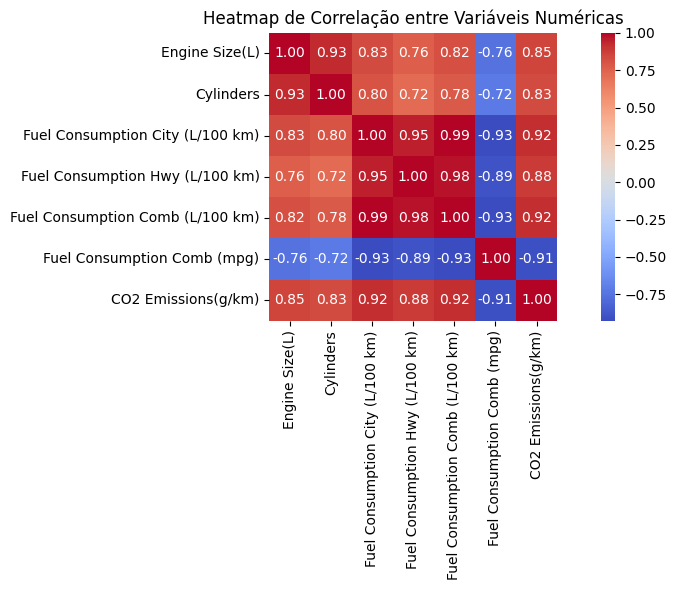

In [ ]:
# Calcular a matriz de correlação
correlation_matrix = df.corr(numeric_only=True)

# Plotar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Heatmap de Correlação entre Variáveis Numéricas")
plt.tight_layout()
plt.show()

Em uma regressão linear, é importante evitar o uso de variáveis altamente correlacionadas entre si (colinearidade), pois isso pode:

* Inflar os coeficientes do modelo

* Tornar a interpretação dos pesos difícil

* Reduzir a estabilidade das previsões

Assim, vamos eliminar as variáveis redundantes.

In [ ]:
# Lista de colunas de consumo a remover
colunas_consumo = [
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (mpg)'
]

# Remover colunas de consumo redundantes
df_encoded = df_encoded.drop(columns=colunas_consumo)

# Verificar colunas restantes
df_encoded.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km),Fuel Type_E,Fuel Type_N,Fuel Type_X,Fuel Type_Z,Transmission_A4,Transmission_A5,...,Transmission_AS8,Transmission_AS9,Transmission_AV,Transmission_AV10,Transmission_AV6,Transmission_AV7,Transmission_AV8,Transmission_M5,Transmission_M6,Transmission_M7
0,2.0,4,8.5,196,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.4,4,9.6,221,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,1.5,4,5.9,136,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3.5,6,11.1,255,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,3.5,6,10.6,244,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


### 4. Divida o conjunto em treino e teste (por exemplo, 80%/20%).


In [ ]:
# Separar X e y
X = df_encoded.drop(columns=['CO2 Emissions(g/km)'])
y = df_encoded['CO2 Emissions(g/km)']

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 5. Treine ao menos dois modelos para estimar as emissões de CO₂.

Exemplos: regressão linear, k-vizinhos próximos, árvore de decisão e floresta aleatória.

In [ ]:
# Dicionário de modelos
modelos = {
    "Regressão Linear": LinearRegression(),
    "k-NN": KNeighborsRegressor(n_neighbors=3),
    "Árvore de Decisão": DecisionTreeRegressor(random_state=42),
    "Floresta Aleatória": RandomForestRegressor(random_state=42)
}

In [ ]:
# Armazenar resultados
resultados = []

# Armazenar os modelos treinados em um dicionário simples
modelos_salvos = {}

# Treinar e avaliar os modelos
for nome, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    modelos_salvos[nome] = modelo
    y_pred = modelo.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    resultados.append({"Modelo": nome, "MAE": mae, "R²": r2})

# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados)

df_resultados

,Modelo,MAE,R²
0,Regressão Linear,3.160542,0.989239
1,k-NN,2.800045,0.992177
2,Árvore de Decisão,2.144370,0.993562
3,Floresta Aleatória,2.234346,0.994488


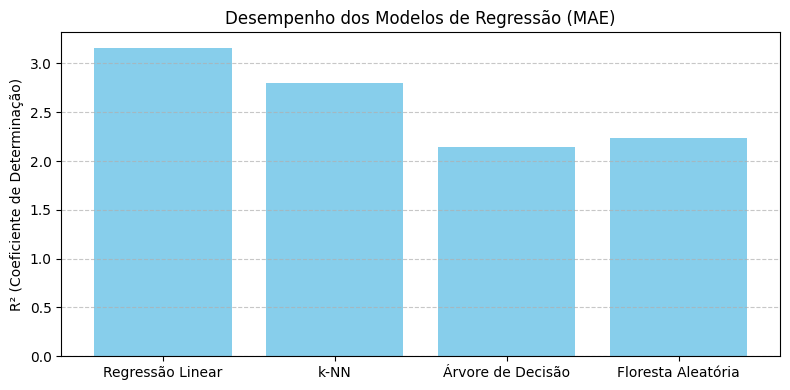

In [ ]:
# Gráfico
plt.figure(figsize=(8, 4))
plt.bar(df_resultados['Modelo'], df_resultados['MAE'], color='skyblue')
plt.ylabel("R² (Coeficiente de Determinação)")
plt.title("Desempenho dos Modelos de Regressão (MAE)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Os modelos que tiveram melhor desempenho na tarefa foram Árvore de Decisão e Floresta Aleatória.

## 6. Avalie o desempenho dos modelos:

Quais métricas são mais adequadas para esse tipo de tarefa?



Numa tarefa de regressão, os valores preditos são números reais. Assim, não faz sentido dizer que acertamos ou erramos a previsão (já que há infinitos valores reais). Nesse caso, medidos a **diferença** entre o valor previsto e o valor real.

Duas métricas que calculam esse erro são o **Erro Quadrático Médio** (EQM) e o **R-quadrado**. O EQM pode ser qualquer valor positivo, enquanto o R-quadrado fica (geralmente) entre 0 e 1. Quanto menor o EQM ou quanto menor o R-quadrado, melhores as previsões do modelo. Lembrando que estaos interessados nos valores previstos para o conjunto **teste**.

O modelo parece estar superajustado ou subajustado?


Para analisar se o modelo está superajustado ou subajustado, precisamos comparar os resultados no conjunto treino e os do conjunto teste. Vamos calcular os resultados para o primeiro.

In [ ]:
# Adicionar avaliação no conjunto de treino
resultados_treino = []

for nome, modelo in modelos.items():
    y_train_pred = modelo.predict(X_train)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    resultados_treino.append({"Modelo": nome, "MAE (treino)": mae_train, "R² (treino)": r2_train})

# Combinar com os resultados anteriores de teste
df_treino = pd.DataFrame(resultados_treino)
df_resultado_completo = df_resultados.merge(df_treino, on="Modelo")

df_resultado_completo

,Modelo,MAE,R²,MAE (treino),R² (treino)
0,Regressão Linear,3.160542,0.989239,2.983024,0.992019
1,k-NN,2.800045,0.992177,1.761453,0.997713
2,Árvore de Decisão,2.144370,0.993562,0.949695,0.999220
3,Floresta Aleatória,2.234346,0.994488,1.253561,0.998942


Todos os modelos foram melhor no treino do que no teste. Esse comportamento é natural, já que esses dados foram usados para estimar os parâmetros (com exceção do k-NN que não é um modelo paramétrico).

Ainda assim, os modelos tiveram um desempenho relativamente estável entre treino e teste. Isso indica que conseguiram generalizar bem sem superajuste.

### 7. Interprete os resultados

Quais variáveis mais influenciam na emissão de CO₂?


Na regressão linear, os coeficientes do modelo indicam a influência de cada variável. Variáveis com coeficientes mais altos (positivos ou negativos) têm mais impacto na previsão.


In [ ]:
# Obter os coeficientes
coeficientes = pd.Series(modelos_salvos['Regressão Linear'].coef_, index=X.columns).sort_values(ascending=False)

print(coeficientes)

Fuel Consumption Comb (L/100 km)    2.227546e+01
Transmission_AM9                    1.089116e+00
Cylinders                           5.676774e-01
Engine Size(L)                      2.563553e-01
Fuel Type_N                        -7.105427e-15
Transmission_AS10                  -1.603858e+00
Transmission_A9                    -1.633366e+00
Transmission_A7                    -1.634724e+00
Transmission_A8                    -1.847123e+00
Transmission_AS9                   -2.507722e+00
Transmission_AS8                   -3.166617e+00
Transmission_AM8                   -3.256605e+00
Transmission_AM7                   -3.376971e+00
Transmission_A5                    -3.436745e+00
Transmission_AS6                   -3.564183e+00
Transmission_M7                    -3.848803e+00
Transmission_AS7                   -3.916005e+00
Transmission_M6                    -4.154295e+00
Transmission_AS5                   -4.182378e+00
Transmission_A6                    -4.432695e+00
Transmission_M5     

As variáveis com maior impacto na emissão de CO2, de acordo com a regressão linear, são `Fuel Consumption Comb (L/100 km)` e `Transmission_AM9`.

Na árvore de decisão, usamos o atributo `feature_importances_` para verificar a importância relativa das variáveis no processo de decisão.

In [ ]:
# Importância das variáveis
importancias = pd.Series(modelos_salvos['Árvore de Decisão'].feature_importances_, index=X.columns).sort_values(ascending=False)

print(importancias)

Fuel Consumption Comb (L/100 km)    9.377128e-01
Fuel Type_E                         5.515700e-02
Fuel Type_X                         1.654412e-03
Engine Size(L)                      1.186726e-03
Fuel Type_Z                         1.097149e-03
Cylinders                           6.285980e-04
Transmission_A6                     5.711101e-04
Transmission_AS8                    5.131848e-04
Transmission_AS10                   4.558934e-04
Transmission_A8                     4.471128e-04
Transmission_AS7                    1.665071e-04
Transmission_AS6                    1.005013e-04
Transmission_A9                     9.268728e-05
Transmission_M6                     8.648506e-05
Transmission_AV                     1.683313e-05
Transmission_A5                     1.477484e-05
Transmission_AM7                    1.335111e-05
Transmission_AV7                    9.451034e-06
Transmission_M5                     9.435561e-06
Transmission_AM6                    9.078188e-06
Transmission_A7     

Para a árvore de decisão, as features com maior importância para a estimar a variável de saída são `Fuel Consumption Comb (L/100 km)` e
`Fuel Type_E`.

Que melhorias ou ajustes poderiam ser feitos?

Algumas estratégias que poderiam ajudar a melhorar o desempenho dos modelos:

* **Ajuste de hiperparâmetros:** Especialmente para modelos como floresta aleatória, árvore de decisão e k-NN, ajustar parâmetros como `max_depth`, `n_neighbors`, `min_samples_split` ou `n_estimators` pode melhorar significativamente a performance e evitar overfitting.
* **Remoção de variáveis menos relevantes:** Embora o dataset já tenha sido enxugado, é possível eliminar variáveis com baixa importância (por exemplo, `Fuel Type_N`, `Transmission_AV10`) para simplificar ainda mais o modelo.
* **Testar novos algoritmos:** Modelos como Gradient Boosting (XGBoost, LightGBM) costumam ter excelente desempenho em tarefas de regressão tabular e poderiam ser testados.

